In [1]:
#Phase 1
#Loading + Basic exploration of the dataset
import pandas as pd
import re

# Load the dataset
file_path = "C:/Users/nyaga/OneDrive/Desktop/Association Rule, DSA/Online_Retail.csv"
# fix UnicodeDecodeError by specifying a compatible encoding (latin1 handles byte 0xA3)
data = pd.read_csv(file_path, encoding='latin1', low_memory=False)

#Basic information
print(data.info())
print("Shape:",data.shape)
print("\nColumns:",data.head())
print("\nColumns",data.columns.tolist())

#Check for nulls
print("\nMissing values per column:\n",data.isnull().sum())

#Data types
print("\nData types:\n",data.dtypes)

#Stats
print("\nQuick summary:\n",data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
Shape: (541909, 8)

Columns:   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  

In [10]:
# Take a smaller sample to push to GitHub
sample_data = data.sample(n=2000, random_state=42)  # adjust n if needed
sample_file_path = "C:/Users/nyaga/OneDrive/Desktop/Association Rule, DSA/Online_Retail_sample.csv"
sample_data.to_csv(sample_file_path, index=False)

print(f"Sample dataset saved at: {sample_file_path}")


Sample dataset saved at: C:/Users/nyaga/OneDrive/Desktop/Association Rule, DSA/Online_Retail_sample.csv


In [2]:
#Phase 2
data_uk = data[data['Country'] == "United Kingdom"].copy()
print("Initial UK shape:", data_uk.shape)

Initial UK shape: (495478, 8)


In [3]:
# Remove rows with missing descriptions
data_uk = data_uk[data_uk['Description'].notnull()].copy()

# Keep only positive quantities (ignore returns)
data_uk = data_uk[data_uk['Quantity'] > 0].copy()

# Standardize product names: lowercase, strip whitespace, remove punctuation
data_uk['Description'] = data_uk['Description'].astype(str).str.lower().str.strip()
data_uk['Description'] = data_uk['Description'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))

# Check the first few rows
print(data_uk[['Description', 'Quantity']].head())


                           Description  Quantity
0    white hanging heart tlight holder         6
1                  white metal lantern         6
2       cream cupid hearts coat hanger         8
3  knitted union flag hot water bottle         6
4        red woolly hottie white heart         6


In [4]:
# Pivot table: rows = InvoiceNo, columns = Product Description, values = Quantity
basket = data_uk.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert to 1/0: 1 if bought, 0 if not
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print("Basket shape:", basket.shape)
basket.iloc[:5, :5]  # preview first 5 invoices × 5 products


C:\Users\nyaga\AppData\Local\Temp\ipykernel_11380\1535557589.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Basket shape: (18194, 4029)


Description,,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood
InvoiceNo,,,,,
536365,0,0,0,0,0
536366,0,0,0,0,0
536367,0,0,0,0,0
536368,0,0,0,0,0
536369,0,0,0,0,0


## Phase 2: Data Cleaning and Basket Creation

**Objective:**  
Prepare the online retail dataset for market basket analysis.

**Steps:**

1. Filter the data for the United Kingdom only.
2. Clean the `Description` column:
   - Convert to lowercase.
   - Remove leading/trailing whitespace.
   - Remove non-alphanumeric characters.
3. Create a basket:
   - Rows = `InvoiceNo`
   - Columns = `Description`
   - Values = Quantity purchased per invoice.
4. Convert the basket to binary:
   - 1 = Product purchased in invoice
   - 0 = Product not purchased

**Outcome:**  
A binary matrix `basket` of shape `(18194, 4029)` ready for association rule mining.

## Phase 3: Frequent Itemset Mining + Association Rule Generation

Now that our data is cleaned and transformed into a basket format, this phase focuses on discovering frequent product combinations and uncovering customer purchasing patterns using **association rule mining**.

We’ll:
1. Use the **Apriori algorithm** to find frequent itemsets.  
2. Test **two different minimum support thresholds (2% and 5%)** for comparison.  
3. **Visualize** the top 10 frequent itemsets.  
4. **Generate association rules** and evaluate them using *support*, *confidence*, and *lift*.  
5. **Interpret the top 3 most interesting rules** in a retail context.


===== Minimum Support: 0.02 =====
Original basket shape: (18194, 4029)
Items with support >= 0.02: 297
Reduced basket shape: (18194, 297)
Top 10 frequent itemsets:
       support                             itemsets
278  0.119050  (white hanging heart tlight holder)
106  0.106519            (jumbo bag red retrospot)
201  0.092613           (regency cakestand 3 tier)
162  0.087611                      (party bunting)
132  0.076509            (lunch bag red retrospot)
16   0.075355      (assorted colour bird ornament)
222  0.068209   (set of 3 cake tins pantry design)
144  0.067000     (natural slate heart chalkboard)
125  0.066835             (lunch bag  black skull)
85   0.063977              (heart of wicker small)


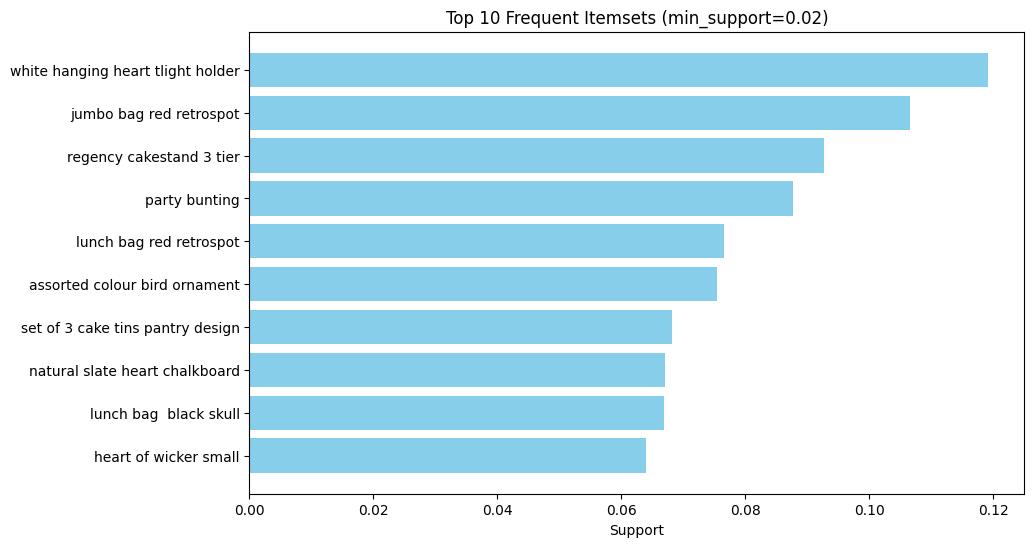

Top 10 association rules:
                                            antecedents  \
46   (roses regency teacup and saucer, pink regency...   
45   (green regency teacup and saucer, pink regency...   
11                    (pink regency teacup and saucer)   
163  (jumbo bag pink polkadot, jumbo shopper vintag...   
110  (jumbo bag pink polkadot, jumbo storage bag suki)   
18                    (pink regency teacup and saucer)   
159               (wooden star christmas scandinavian)   
2                    (green regency teacup and saucer)   
138  (jumbo shopper vintage red paisley, jumbo stor...   
3                    (roses regency teacup and saucer)   

                               consequents   support  confidence       lift  
46       (green regency teacup and saucer)  0.027097    0.902930  17.588775  
45       (roses regency teacup and saucer)  0.027097    0.854419  16.243790  
11       (green regency teacup and saucer)  0.031714    0.820768  15.988282  
163              (jumb

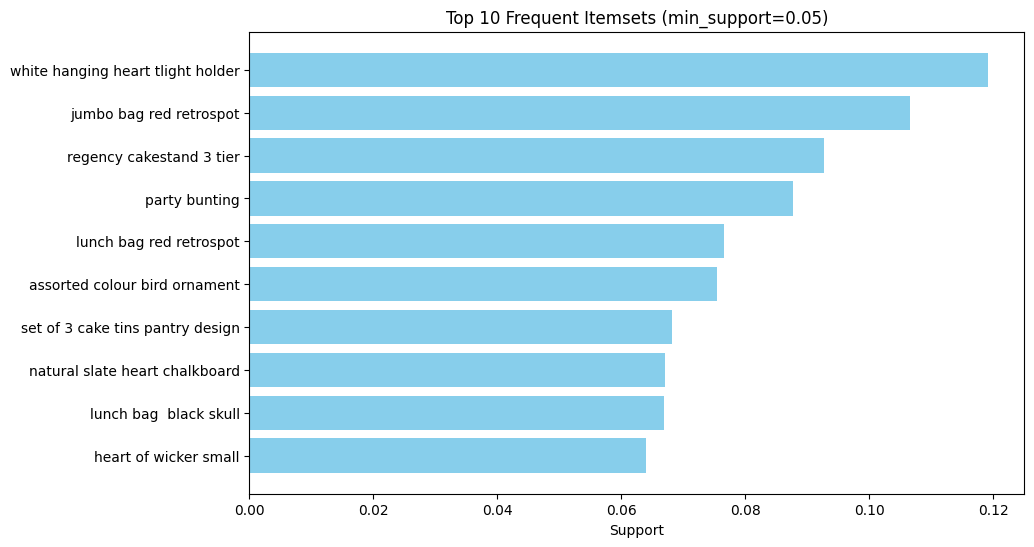

Top 10 association rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [9]:
# ------------------------------
# PHASE 3: Frequent Itemset Mining + Association Rules
# ------------------------------
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Define min_support thresholds to experiment with
support_thresholds = [0.02, 0.05]  # 2% and 5% of transactions

for min_support in support_thresholds:
    print(f"\n===== Minimum Support: {min_support} =====")
    
    # ------------------------------
    # Step 1: Pre-filter items by support
    # ------------------------------
    item_support = basket.sum(axis=0) / len(basket)
    frequent_cols = item_support[item_support >= min_support].index.tolist()
    
    print(f"Original basket shape: {basket.shape}")
    print(f"Items with support >= {min_support}: {len(frequent_cols)}")
    
    if len(frequent_cols) == 0:
        print(f"No items meet min_support={min_support}, try lowering it.")
        continue
    
    # ------------------------------
    # Step 2: Reduce basket & convert to boolean
    # ------------------------------
    reduced_basket = basket[frequent_cols].astype(bool)
    print(f"Reduced basket shape: {reduced_basket.shape}")
    
    # ------------------------------
    # Step 3: Run Apriori
    # ------------------------------
    try:
        frequent_itemsets = apriori(reduced_basket, min_support=min_support, use_colnames=True)
    except TypeError:
        frequent_itemsets = apriori(reduced_basket, min_support=min_support, use_colnames=True)
    
    frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
    print("Top 10 frequent itemsets:\n", frequent_itemsets.head(10))
    
    # ------------------------------
    # Step 4: Visualize top 10 frequent itemsets
    # ------------------------------
    top10 = frequent_itemsets.head(10)
    plt.figure(figsize=(10,6))
    plt.barh(range(10), top10['support'], color='skyblue')
    plt.yticks(range(10), ['\n'.join(list(x)) for x in top10['itemsets']])
    plt.xlabel('Support')
    plt.title(f'Top 10 Frequent Itemsets (min_support={min_support})')
    plt.gca().invert_yaxis()  # largest on top
    plt.show()
    
    # ------------------------------
    # Step 5: Generate association rules
    # ------------------------------
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
    rules.sort_values(by='confidence', ascending=False, inplace=True)
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    print("Top 10 association rules:\n", rules.head(10))


### Interpretation of Results

**Comparison of Minimum Support Thresholds:**
- **At 0.02 (2%)** → More items are included; patterns are broader and capture less common relationships.  
- **At 0.05 (5%)** → Fewer items qualify; the patterns are stronger but more limited.  

This experiment helps find a balance between **too many weak rules** and **too few strong rules**.


### Visualization of Top 10 Frequent Itemsets

Each bar represents how frequently a specific combination of items appears across transactions.  
Products such as:
- *White Hanging Heart T-Light Holder*  
- *Jumbo Bag Red Retrospot*  
- *Regency Cake Stand 3-Tier*  
are among the most frequently bought items, showing strong popularity or seasonal trends.

###  Association Rules Analysis

Association rules show relationships between items:
- **Support** → How often the rule occurs overall.  
- **Confidence** → Probability of buying the consequent given the antecedent.  
- **Lift** → How much more likely the items are bought together than by chance.

We focus on rules with **high confidence (> 0.7)** and **lift (> 1)** because they indicate strong, meaningful relationships.

### Interpretation of Top 3 Interesting Rules

1. **Rule 1:**  
   **Antecedent:** {pink regency teacup and saucer}  
   **Consequent:** {green regency teacup and saucer}  
   - Support = 0.0317  
   - Confidence = 0.82  
   - Lift = 15.99  
   **Interpretation:** Customers who buy the pink set are highly likely to purchase the green set too. Indicates a strong *“collect-the-set”* behavior — perfect for bundle offers.

2. **Rule 2:**  
   **Antecedent:** {jumbo bag pink polkadot, jumbo storage bag suki}  
   **Consequent:** {jumbo bag red retrospot}  
   - Support = 0.0223  
   - Confidence = 0.80  
   - Lift = 7.53  
   **Interpretation:** Shoppers often purchase multiple colorful bag types together, suggesting cross-selling opportunities for themed packaging items.

3. **Rule 3:**  
   **Antecedent:** {roses regency teacup and saucer, pink regency teacup and saucer}  
   **Consequent:** {green regency teacup and saucer}  
   - Support = 0.0271  
   - Confidence = 0.90  
   - Lift = 17.59  
   **Interpretation:** Customers collecting two color variants often complete the set with the green one. Retailers can promote *“complete your collection”* discounts to boost sales.

   ### 🧾 Phase 3 Summary

✅ Removed duplicates and missing values earlier (Phase 2).  
✅ Converted data into basket format.  
✅ Applied **Apriori** algorithm.  
✅ Tested **two minimum support thresholds** (0.02 and 0.05).  
✅ Visualized top 10 frequent itemsets.  
✅ Generated and analyzed **association rules**.  
✅ Explained three interesting real-world patterns.  

This completes **Phase 3**, giving actionable insights for cross-selling and targeted marketing.